In [2]:
import numpy as np
from gol.ga.ga_gol import GAGol
from gol.gol import create_gol_instance_from_board

In [19]:
from gol.visualize import parse_pattern

def add_pattern_to_board(board, pattern, row, col):
    board[row:row + pattern.shape[0], col:col + pattern.shape[1]] = pattern
    return board

def prepare_board(height, width, steps):
    glider_pattern = parse_pattern("../patterns/glider.txt")
    toad_pattern = parse_pattern("../patterns/toad.txt")
    beacon_pattern = parse_pattern("../patterns/beacon.txt")
    
    board = np.zeros((height, width))
    
    add_pattern_to_board(board, glider_pattern, 1, 2)
    add_pattern_to_board(board, glider_pattern, 14, 13)
    
    add_pattern_to_board(board, toad_pattern, 8, 2)
    add_pattern_to_board(board, toad_pattern, 5, 12)
    
    add_pattern_to_board(board, beacon_pattern, 14, 2)
    add_pattern_to_board(board, beacon_pattern, 1, 8)
    
    ca = create_gol_instance_from_board(board)
    ca.evolve_and_apply(steps)
    
    return ca

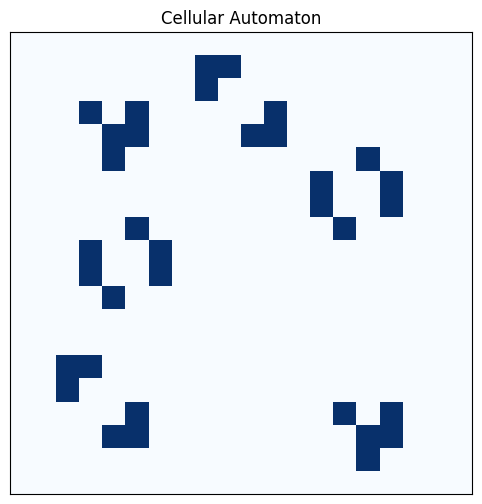

In [20]:
from visualize import visualize_current_state

ca = prepare_board(20, 20, 5)
visualize_current_state(ca)

In [25]:
ga = GAGol(
    target=ca.board,
    population_size=200,
    n_generations=500,
    crossover_rate=0.5,
    mutation_rate=0.1,
    retention_rate=0.6,
    random_selection_rate=0.05,
    steps=5
)

In [26]:
ga.evolution()

Generation 0: Best fitness 0.85
Generation 1: Best fitness 0.85
Generation 2: Best fitness 0.85
Generation 3: Best fitness 0.85
Generation 4: Best fitness 0.8525
Generation 5: Best fitness 0.8525
Generation 6: Best fitness 0.8525
Generation 7: Best fitness 0.8525
Generation 8: Best fitness 0.8525
Generation 9: Best fitness 0.8525
Generation 10: Best fitness 0.8525
Generation 11: Best fitness 0.8525
Generation 12: Best fitness 0.8525
Generation 13: Best fitness 0.8525
Generation 14: Best fitness 0.8525
Generation 15: Best fitness 0.8525
Generation 16: Best fitness 0.8525
Generation 17: Best fitness 0.8525
Generation 18: Best fitness 0.8525
Generation 19: Best fitness 0.86
Generation 20: Best fitness 0.86
Generation 21: Best fitness 0.86
Generation 22: Best fitness 0.86
Generation 23: Best fitness 0.86
Generation 24: Best fitness 0.86
Generation 25: Best fitness 0.86
Generation 26: Best fitness 0.86
Generation 27: Best fitness 0.86
Generation 28: Best fitness 0.86
Generation 29: Best fit

In [23]:
top_performing_cas = ga.get_top_n_fittest_individuals(3)

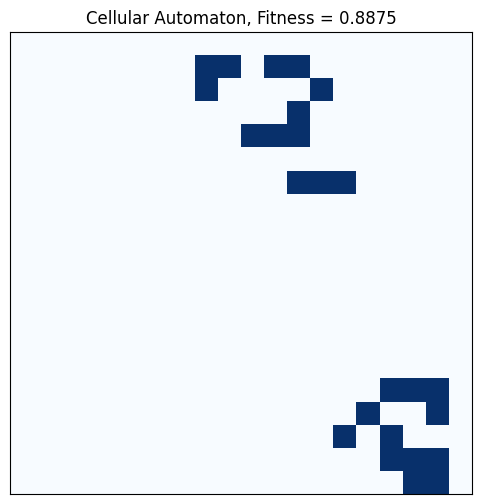

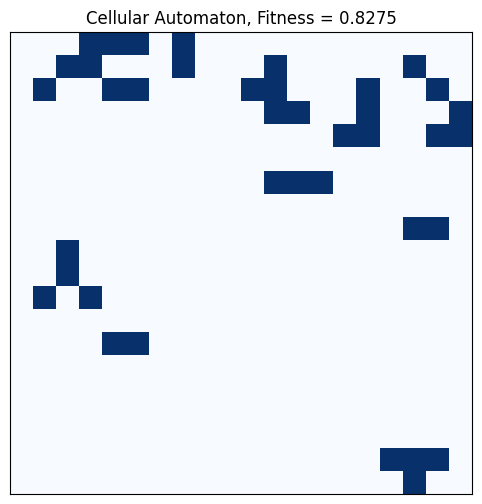

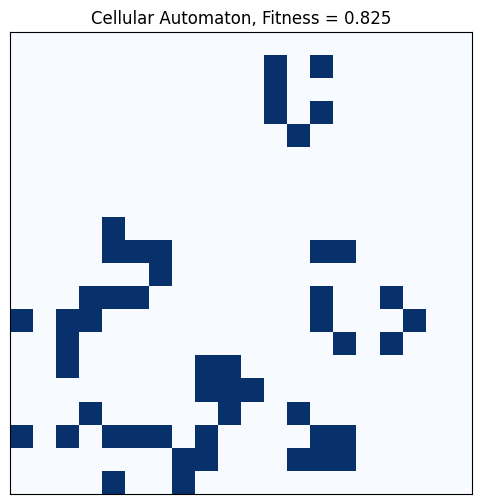

In [24]:
for ca_item in top_performing_cas:
    evolved_board = ca_item['individual'].evolve(5)
    visualize_current_state(evolved_board, ca_item['fitness'])